In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("gene_data_PDWD.tsv", sep = '\t', header = 0, index_col = 0)
df

,SO11-2366_WD,SO11-463_WD,SO11-5496_WD,SO12-5870_WD,SO13-4426_WD,SO13-5018_WD,SO15-3504_WD,SC13-2649_WD,SC13-4067_WD,SC14-1890_WD,...,SC13-3307_PD,SC14-2227_PD,SC14-299_PD,SC14-4289_PD,SC14-469_PD,SC15-615_PD,SC15-1005_PD,SC15-383_PD,SC15-584_PD,SC15-651_PD
Name,,,,,,,,,,,,,,,,,,,,,
CALML3,17,9,7,12,13,28,10,11,8,10,...,7,11,5,11,128,10,47,27,63,744
PIK3R2,767,767,754,1090,459,958,551,339,716,650,...,370,1179,576,343,270,765,144,634,527,339
IL11RA,206,238,100,333,262,248,238,91,196,204,...,86,303,107,104,34,89,54,127,99,63
BAMBI,149,210,131,62,393,409,373,33,168,72,...,68,114,12,35,518,18,10,322,1503,2468
PLA2G10,14,388,8,508,38,697,51,57,213,676,...,148,8,13,6,33,73,9,22,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC2D1B,45,44,36,64,36,56,28,21,40,57,...,25,44,21,30,10,20,11,43,27,7
GPATCH3,38,70,25,78,39,79,35,20,43,62,...,22,46,32,27,21,56,12,35,34,30
ZNF143,113,91,112,153,115,158,148,23,102,147,...,143,168,100,141,104,223,54,165,189,190


In [2]:
df_log = np.log( df+1 )
df_log 

,SO11-2366_WD,SO11-463_WD,SO11-5496_WD,SO12-5870_WD,SO13-4426_WD,SO13-5018_WD,SO15-3504_WD,SC13-2649_WD,SC13-4067_WD,SC14-1890_WD,...,SC13-3307_PD,SC14-2227_PD,SC14-299_PD,SC14-4289_PD,SC14-469_PD,SC15-615_PD,SC15-1005_PD,SC15-383_PD,SC15-584_PD,SC15-651_PD
Name,,,,,,,,,,,,,,,,,,,,,
CALML3,2.890372,2.302585,2.079442,2.564949,2.639057,3.367296,2.397895,2.484907,2.197225,2.397895,...,2.079442,2.484907,1.791759,2.484907,4.859812,2.397895,3.871201,3.332205,4.158883,6.613384
PIK3R2,6.643790,6.643790,6.626718,6.994850,6.131226,6.865891,6.313548,5.828946,6.575076,6.478510,...,5.916202,7.073270,6.357842,5.840642,5.602119,6.641182,4.976734,6.453625,6.269096,5.828946
IL11RA,5.332719,5.476464,4.615121,5.811141,5.572154,5.517453,5.476464,4.521789,5.283204,5.323010,...,4.465908,5.717028,4.682131,4.653960,3.555348,4.499810,4.007333,4.852030,4.605170,4.158883
BAMBI,5.010635,5.351858,4.882802,4.143135,5.976351,6.016157,5.924256,3.526361,5.129899,4.290459,...,4.234107,4.744932,2.564949,3.583519,6.251904,2.944439,2.397895,5.777652,7.315884,7.811568
PLA2G10,2.708050,5.963579,2.197225,6.232448,3.663562,6.548219,3.951244,4.060443,5.365976,6.517671,...,5.003946,2.197225,2.639057,1.945910,3.526361,4.304065,2.302585,3.135494,1.791759,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC2D1B,3.828641,3.806662,3.610918,4.174387,3.610918,4.043051,3.367296,3.091042,3.713572,4.060443,...,3.258097,3.806662,3.091042,3.433987,2.397895,3.044522,2.484907,3.784190,3.332205,2.079442
GPATCH3,3.663562,4.262680,3.258097,4.369448,3.688879,4.382027,3.583519,3.044522,3.784190,4.143135,...,3.135494,3.850148,3.496508,3.332205,3.091042,4.043051,2.564949,3.583519,3.555348,3.433987
ZNF143,4.736198,4.521789,4.727388,5.036953,4.753590,5.068904,5.003946,3.178054,4.634729,4.997212,...,4.969813,5.129899,4.615121,4.955827,4.653960,5.411646,4.007333,5.111988,5.247024,5.252273


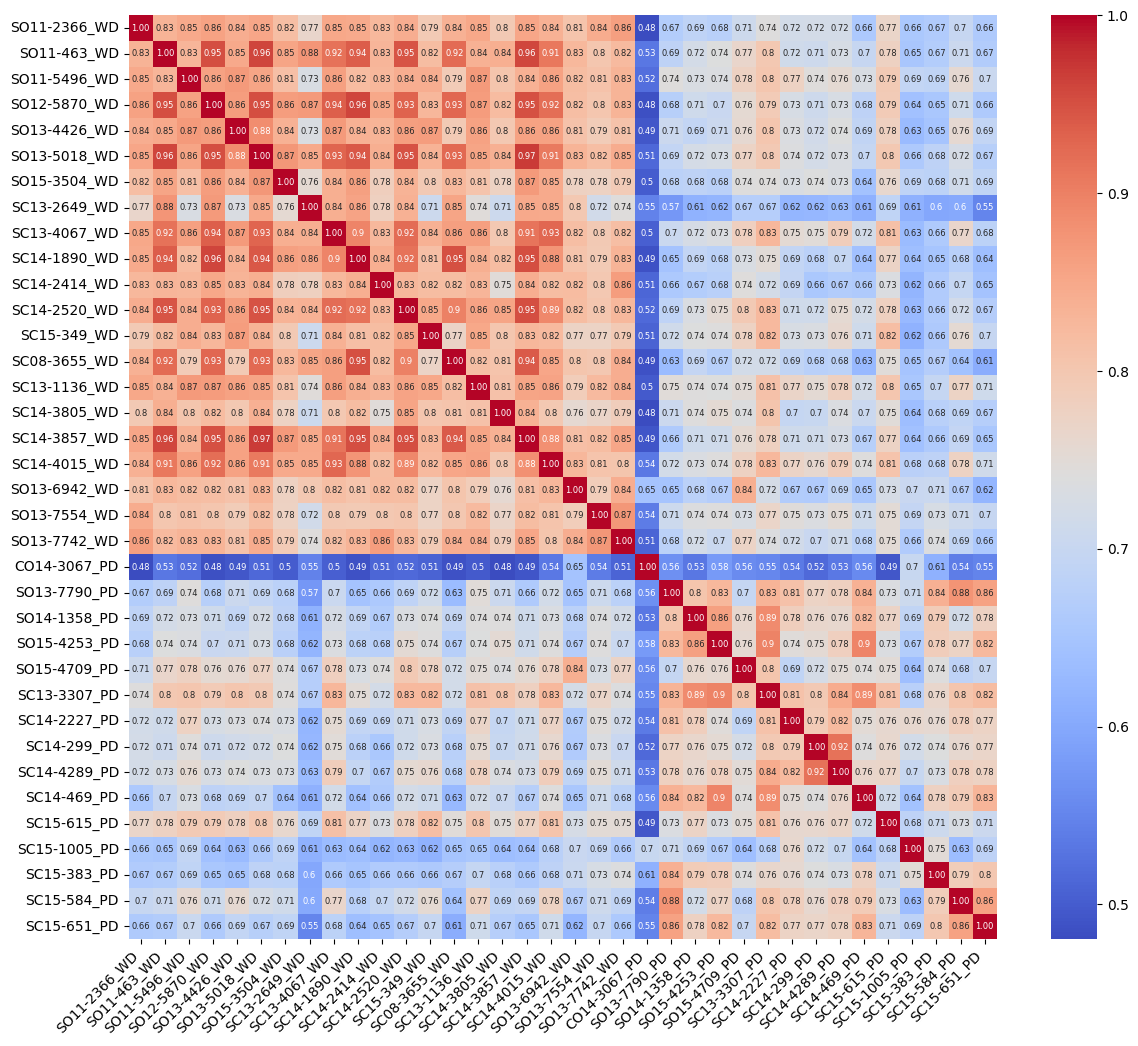

In [3]:
import pandas as pd
import seaborn as sns
from scipy import stats

#empty correlation matrix
corr_matrix = pd.DataFrame(index=df_log.columns, columns=df_log.columns)

#corr_matrix

# Compute correlation for each pair of columns
for col1 in df_log.columns:
    for col2 in df_log.columns:
        r, p = stats.pearsonr(df_log[col1], df_log[col2])
        corr_matrix.loc[col1, col2] = r

corr_matrix = corr_matrix.astype(float)

plt.figure(figsize=(14, 12))

#ax = sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, annot_kws={"size": 6}, vmin=0.0, vmax=1.0) # fmt=".1f"
ax = sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, annot_kws={"size": 6}) # fmt=".1f"
#ax = sns.heatmap(corr_matrix, cmap="Blues", annot=True, annot_kws={"size": 6}) # fmt=".1f"

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


for t in ax.texts: 
    if (t.get_text() == '1'):
        t.set_text("1.00")
    else:
        t.set_text(t.get_text())

plt.savefig("r_val_all.pdf")
plt.show()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=479021a8-7c58-4ce8-a173-5b75b64309eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>